# Business Problem
A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. 
Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

# Business Objective
The objective of this analysis is to develop a Simple Linear Regression model to predict the employee churn out rate based on the salary hike in a financial year. By estimating churn early, the organization can take proactive measures to retain employees, optimize salary structures, and improve HR policies.



# Business Constraints
1. Interpretability: Model should be simple and understandable for HR teams.
2. Data Quality: Ensure clean, structured data with minimal missing values.
3. Timeliness: Predictions must be made early for proactive HR actions.
4. Scalability: Model should work for different organization sizes.
5. Regulatory Compliance: Must adhere to labor laws and ethical guidelines.
6. Performance Metrics: Evaluate using RMSE and correlation coefficient.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("emp_data.csv")
data.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [3]:
data.shape

(10, 2)

In [4]:
data.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [6]:
data.isnull().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

In [7]:
correlation=data['Salary_hike'].corr(data['Churn_out_rate'])
correlation

-0.9117216186909112

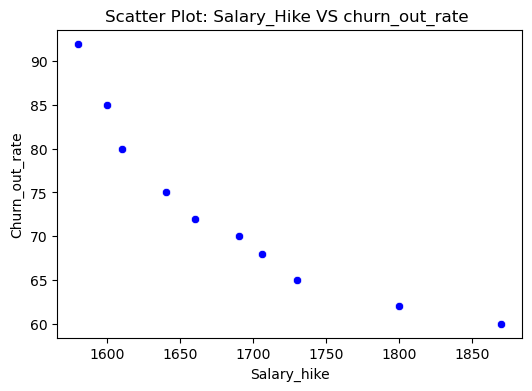

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Salary_hike'],y=data['Churn_out_rate'],color='blue')
plt.xlabel("Salary_hike")
plt.ylabel("Churn_out_rate")
plt.title("Scatter Plot: Salary_Hike VS churn_out_rate ")
plt.show()

In [9]:
data.shape

(10, 2)

In [10]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression()

In [12]:
lin.fit(data[['Churn_out_rate']],data[['Salary_hike']])

LinearRegression()

In [32]:
from sklearn.metrics import r2_score 

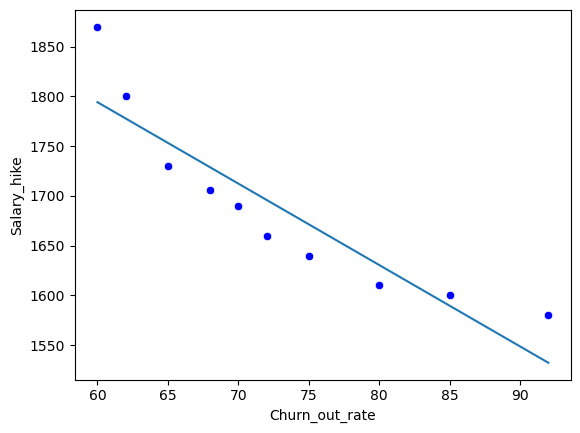

In [50]:
sns.scatterplot(x=data['Churn_out_rate'],y=data['Salary_hike'],color='blue')
plt.plot(data['Churn_out_rate'],lin.predict(data[['Churn_out_rate']]))

In [30]:
pred1=lin.predict(data[['Churn_out_rate']])

In [31]:
r2_score(data[['Salary_hike']],pred1)

0.8312363099883755

In [33]:
from sklearn.preprocessing import PolynomialFeatures 
pol = PolynomialFeatures(degree=2)

In [55]:
X_train = pol.fit_transform(data[['Churn_out_rate']])
y_train=data[['Salary_hike']]

In [56]:
data['Churn_out_rate'].values

array([92, 85, 80, 75, 72, 70, 68, 65, 62, 60], dtype=int64)

In [57]:
data[['Churn_out_rate']]

,Churn_out_rate
0,92
1,85
2,80
3,75
4,72
5,70
6,68
7,65
8,62
9,60


In [58]:
data['Churn_out_rate']

0    92
1    85
2    80
3    75
4    72
5    70
6    68
7    65
8    62
9    60
Name: Churn_out_rate, dtype: int64

In [59]:
lin2 = LinearRegression()
lin2.fit(X_train,y_train)

LinearRegression()

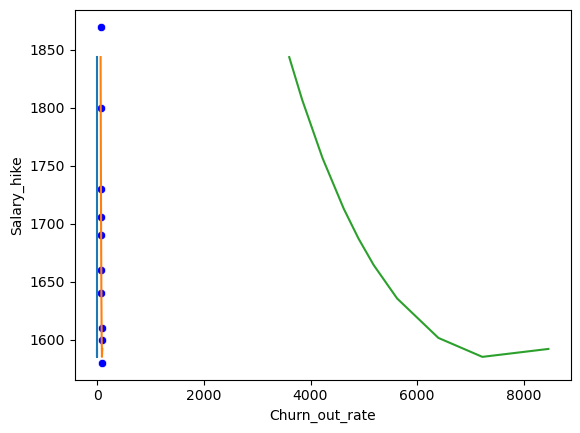

In [61]:
sns.scatterplot(x=data['Churn_out_rate'],y=data['Salary_hike'],color='blue')
plt.plot(X_train,lin2.predict(X_train))